In [48]:
# Heart Attack Analysis & Prediction Dataset
# https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

import numpy as np
import pandas as pd
import seaborn as sns
import os

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from collections import Counter

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


In [6]:
df = pd.read_csv("/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
y = np.array(df["output"])
X = np.array(df.loc[:, df.columns != 'output'])

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [32]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [33]:
class NeuralNetwork:
    def __init__(self, LR, X_train, y_train, X_test, y_test):
        self.w = np.random.randn(X_train.shape[1])
        self.b = np.random.randn()
        self.LR = LR
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.loss_train = []
        self.loss_test = []

    def activation(self, x):
        # sigmoid
        return 1 / (1 + np.exp(-x))

    def derivative_of_activation(self, x):
        # derivative of the sigmoid
        return self.activation(x) * (1 - self.activation(x))

    def forward(self, X):
        hidden_layer = np.dot(X, self.w) + self.b
        return self.activation(hidden_layer)

    def backward(self, X, y_true):
        hidden_layer = np.dot(X, self.w) + self.b
        y_prediction = self.forward(X)
        dL_dprediction = 2 * (y_prediction - y_true)
        dprediction_dhidden = self.derivative_of_activation(hidden_layer)
        dhidden_db = 1
        dhidden_dw = X
        
        dL_db = dL_dprediction * dprediction_dhidden * dhidden_db
        dL_dw = dL_dprediction * dprediction_dhidden * dhidden_dw
        
        return dL_db, dL_dw

    def optimizer(self, dL_db, dL_dw):
        self.b = self.b - dL_db * self.LR
        self.w = self.w - dL_dw * self.LR

    def train(self, ITERATIONS):
        for _ in range(ITERATIONS):
            random_position = np.random.randint(len(self.X_train))

            # forward pass
            y_train_true = self.y_train[random_position]
            y_train_prediction = self.forward(self.X_train[random_position])

            # calculate the loss
            loss = np.sum(np.square(y_train_prediction - y_train_true))
            self.loss_train.append(loss)

            # calculate the gradients
            dL_db, dL_dw = self.backward(
                self.X_train[random_position],
                self.y_train[random_position]
            )

            # update the weights
            self.optimizer(dL_db, dL_dw)

            # calculate the error for test data (loss sum)
            loss_sum = 0

            for index in range(len(self.X_test)):
                y_true = self.y_test[index]
                y_prediction = self.forward(self.X_test[index])
                loss_sum += np.square(y_prediction - y_true)

            self.loss_test.append(loss_sum)

        return 'Successful training'

In [51]:
LR = 0.1
ITERATIONS = 1000

model = NeuralNetwork(
    LR=LR,
    X_train=scaled_X_train,
    y_train=y_train,
    X_test=scaled_X_test,
    y_test=y_test
)

model.train(ITERATIONS=ITERATIONS)

'Successful training'

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

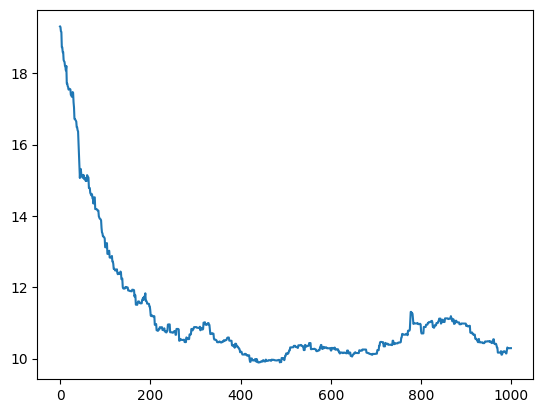

In [52]:
sns.lineplot(x=list(range(len(model.loss_test))), y=model.loss_test)

In [53]:
total = scaled_X_test.shape[0]
correct = 0
y_predictions = []

for index in range(total):
    y_true = y_test[index]
    y_prediction = np.round(model.forward(scaled_X_test[index]))
    y_predictions.append(y_prediction)
    correct += 1 if y_true == y_prediction else 0

accuracy = correct / total
accuracy

0.7868852459016393

In [54]:
Counter(y_test)

Counter({1: 31, 0: 30})

In [55]:
confusion_matrix(y_true=y_test, y_pred=y_predictions)

array([[24,  6],
       [ 7, 24]])